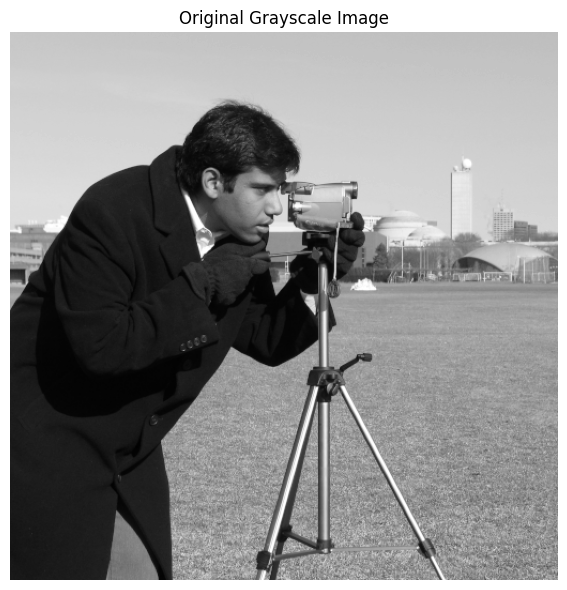

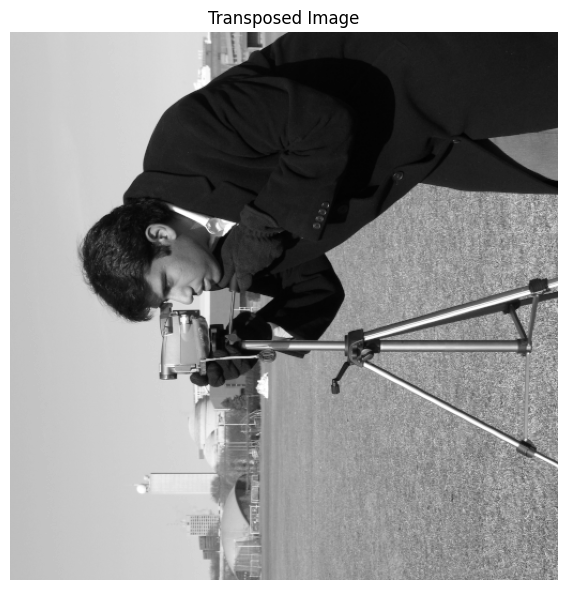

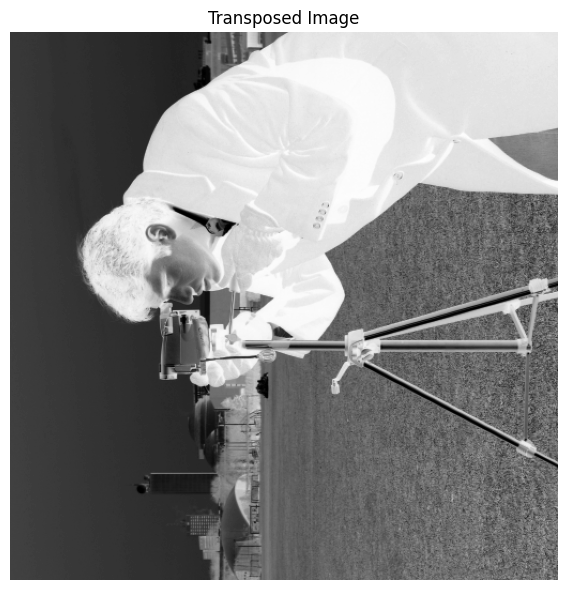

Original image dimensions: 512x512
Square matrix size used: 512x512

--- Original Image (A) ---
Number of eigenvalues: 512
First ten sorted eigenvalues:
[60583.4506025  17764.4918619   4419.66867788  2199.30017225
  1249.95203381   925.68527488   925.68527488   681.8166146
   681.8166146    617.04516691]
Shape of sorted eigenvectors matrix: (512, 512)

--- Transposed Image (Aᵀ) ---
Number of eigenvalues: 512
First ten sorted eigenvalues:
[60583.4506025  17764.4918619   4419.66867788  2199.30017225
  1249.95203381   925.68527488   925.68527488   681.8166146
   681.8166146    617.04516691]
Shape of sorted eigenvectors matrix: (512, 512)
Number of eigenvalues: 512
First ten sorted eigenvalues:
[60583.4506025  17764.4918619  -3311.71720382 -1989.92442326
 -1367.47697234 -1367.47697234  -934.60973445  -934.60973445
  -616.8863283   -616.8863283 ]
Shape of sorted eigenvectors matrix: (512, 512)


In [1]:
import requests
from PIL import Image
import numpy as np
import io
import base64
import matplotlib.pyplot as plt

# Step 1: Fetch the cameraman image from the specified URL
url = "https://raw.githubusercontent.com/scikit-image/scikit-image/main/skimage/data/camera.png"
response = requests.get(url)
if response.status_code != 200:
    raise Exception("Failed to fetch the image from the provided URL")

# Step 2: Load the image and convert to grayscale
image = Image.open(io.BytesIO(response.content))
grayscale_image = image.convert('L')

# Step 3: Convert the grayscale image to a numpy array
image_array = np.array(grayscale_image)

# Step 4: Ensure the image matrix is square for eigenvalue computation
height, width = image_array.shape
size = min(height, width)
square_image = image_array[:size, :size]

# Step 5: Create a symmetric matrix for the original image (A^T A)
#symmetric_matrix = np.dot(square_image.T, square_image)

# Step 6: Compute eigenvalues and eigenvectors of the symmetric matrix
eigenvalues, eigenvectors = np.linalg.eig(square_image)

# Step 7: Sort eigenvalues and eigenvectors in descending order
eigenvalues = np.real(eigenvalues)
sort_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sort_indices]
sorted_eigenvectors = eigenvectors[:, sort_indices]

# Step 8: Transpose the image matrix
transposed_image = square_image.T
eigenvalues_transposed, eigenvectors_transposed = np.linalg.eig(transposed_image)

# Step 9: Create a symmetric matrix for the transposed image (A A^T)
#symmetric_matrix_transposed = np.dot(square_image, square_image.T)

# Step 10: Compute eigenvalues and eigenvectors of the transposed symmetric matrix
#eigenvalues_transposed, eigenvectors_transposed = np.linalg.eigh(symmetric_matrix_transposed)

# Step 11: Sort eigenvalues and eigenvectors of the transposed matrix
eigenvalues_transposed = np.real(eigenvalues_transposed)
sort_indices_transposed = np.argsort(eigenvalues_transposed)[::-1]
sorted_eigenvalues_transposed = eigenvalues_transposed[sort_indices_transposed]
sorted_eigenvectors_transposed = eigenvectors_transposed[:, sort_indices_transposed]

transposed_image2 = 255-transposed_image
eigenvalues_transposed2, eigenvectors_transposed2 = np.linalg.eig(transposed_image2)

# Step 9: Create a symmetric matrix for the transposed image (A A^T)
#symmetric_matrix_transposed = np.dot(square_image, square_image.T)

# Step 10: Compute eigenvalues and eigenvectors of the transposed symmetric matrix
#eigenvalues_transposed, eigenvectors_transposed = np.linalg.eigh(symmetric_matrix_transposed)

# Step 11: Sort eigenvalues and eigenvectors of the transposed matrix
eigenvalues_transposed2 = np.real(eigenvalues_transposed2)
sort_indices_transposed2 = np.argsort(eigenvalues_transposed2)[::-1]
sorted_eigenvalues_transposed2 = eigenvalues_transposed[sort_indices_transposed2]
sorted_eigenvectors_transposed2 = eigenvectors_transposed[:, sort_indices_transposed2]


# Plot: Grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(grayscale_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot: Transposed image
plt.figure(figsize=(6, 6))
plt.imshow(transposed_image, cmap='gray')
plt.title("Transposed Image")
plt.axis('off')
plt.tight_layout()
plt.show()


# Plot: Transposed image2
plt.figure(figsize=(6, 6))
plt.imshow(transposed_image2, cmap='gray')
plt.title("Transposed Image")
plt.axis('off')
plt.tight_layout()
plt.show()

# Summary Output
print(f"Original image dimensions: {height}x{width}")
print(f"Square matrix size used: {size}x{size}")
print(f"\n--- Original Image (A) ---")
print(f"Number of eigenvalues: {len(sorted_eigenvalues)}")
print("First ten sorted eigenvalues:")
print(sorted_eigenvalues[:10])
print("Shape of sorted eigenvectors matrix:", sorted_eigenvectors.shape)
print(f"\n--- Transposed Image (Aᵀ) ---")
print(f"Number of eigenvalues: {len(sorted_eigenvalues_transposed)}")
print("First ten sorted eigenvalues:")
print(sorted_eigenvalues_transposed[:10])
print("Shape of sorted eigenvectors matrix:", sorted_eigenvectors_transposed.shape)
print(f"Number of eigenvalues: {len(sorted_eigenvalues_transposed2)}")
print("First ten sorted eigenvalues:")
print(sorted_eigenvalues_transposed2[:10])
print("Shape of sorted eigenvectors matrix:", sorted_eigenvectors_transposed2.shape)

